In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
import seaborn as sns
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

%matplotlib inline

In [3]:
df = pd.read_csv("AIS_2024_12_31.csv")

In [4]:
df.head(10)

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass
0,367776660,2024-12-31T00:00:08,21.19308,-157.72342,8.0,112.1,106.0,MOUNT BAKER,IMO9822906,WDJ6673,52.0,0.0,40.0,12.0,5.5,52.0,A
1,368095340,2024-12-31T00:00:05,29.76995,-95.07893,0.0,185.5,511.0,GAMBLER,NaN,WDK8562,52.0,15.0,19.0,8.0,0.0,52.0,A
2,366847780,2024-12-31T00:00:00,29.96697,-93.85909,0.1,186.2,220.0,PACIFIC DAWN,IMO7400467,WDA7844,31.0,0.0,30.0,8.0,5.0,31.0,A
3,367481310,2024-12-31T00:00:04,27.68242,-82.58073,11.5,57.6,61.0,OSG COURAGEOUS,IMO9395707,WDF7122,82.0,0.0,204.0,26.0,6.0,82.0,A
4,248669000,2024-12-31T00:00:06,29.85743,-93.94083,3.1,220.9,219.0,EAGLE SAN FRANCISCO,IMO9795127,9HA4753,80.0,0.0,277.0,48.0,10.4,80.0,A
5,367434220,2024-12-31T00:00:05,40.73459,-74.02571,2.8,114.7,511.0,YOGI BERRA,NaN,WDF2990,60.0,0.0,25.0,8.0,2.0,60.0,A
6,367178330,2024-12-31T00:00:04,27.54570,-92.44334,0.1,259.6,296.0,AUGER TLP,NaN,WDD6841,90.0,13.0,103.0,100.0,25.0,90.0,A
7,366954010,2024-12-31T00:00:04,28.94966,-95.33016,0.0,165.6,298.0,GOL WORKER,IMO9297747,WDM5168,70.0,0.0,56.0,15.0,4.1,70.0,A
8,367351510,2024-12-31T00:00:06,29.78715,-95.08310,0.0,326.0,511.0,LIL ELLIOT,NaN,WDN6238,32.0,0.0,17.0,6.0,3.0,32.0,A
9,316001731,2024-12-31T00:00:04,49.15522,-123.00626,0.0,155.9,61.0,ALISON NICOLE I,IMO7406681,CFC6672,32.0,0.0,24.0,8.0,3.4,32.0,A


In [5]:
df.tail(10)

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass
7588966,414037000,2024-12-31T23:34:50,12.72069,142.65326,11.3,282.7,283.0,GUO HAI LIAN 818,IMO9617272,BQXL,70.0,0.0,190.0,32.0,12.7,70.0,A
7588967,414037000,2024-12-31T23:41:11,12.72595,142.63343,11.4,284.9,281.0,GUO HAI LIAN 818,IMO9617272,BQXL,70.0,0.0,190.0,32.0,12.7,70.0,A
7588968,414037000,2024-12-31T23:46:00,12.72969,142.61845,11.3,283.1,283.0,GUO HAI LIAN 818,IMO9617272,BQXL,70.0,0.0,190.0,32.0,12.7,70.0,A
7588969,414037000,2024-12-31T23:32:01,12.71849,142.66207,11.3,287.4,282.0,GUO HAI LIAN 818,IMO9617272,BQXL,70.0,0.0,190.0,32.0,12.7,70.0,A
7588970,414037000,2024-12-31T23:40:00,12.72503,142.63715,11.3,283.1,282.0,GUO HAI LIAN 818,IMO9617272,BQXL,70.0,0.0,190.0,32.0,12.7,70.0,A
7588971,414037000,2024-12-31T23:47:21,12.73083,142.61426,11.3,286.9,284.0,GUO HAI LIAN 818,IMO9617272,BQXL,70.0,0.0,190.0,32.0,12.7,70.0,A
7588972,414037000,2024-12-31T23:52:50,12.73533,142.59715,11.2,283.5,281.0,GUO HAI LIAN 818,IMO9617272,BQXL,70.0,0.0,190.0,32.0,12.7,70.0,A
7588973,414037000,2024-12-31T23:54:00,12.73623,142.59352,11.3,286.6,282.0,GUO HAI LIAN 818,IMO9617272,BQXL,70.0,0.0,190.0,32.0,12.7,70.0,A
7588974,414037000,2024-12-31T23:57:00,12.73871,142.58423,11.1,283.4,283.0,GUO HAI LIAN 818,IMO9617272,BQXL,70.0,0.0,190.0,32.0,12.7,70.0,A
7588975,414037000,2024-12-31T23:58:20,12.73974,142.58017,11.1,283.4,281.0,GUO HAI LIAN 818,IMO9617272,BQXL,70.0,0.0,190.0,32.0,12.7,70.0,A


In [6]:
df.shape

(7588976, 17)

In [7]:
df.info

<bound method DataFrame.info of               MMSI         BaseDateTime       LAT        LON   SOG    COG  \
0        367776660  2024-12-31T00:00:08  21.19308 -157.72342   8.0  112.1   
1        368095340  2024-12-31T00:00:05  29.76995  -95.07893   0.0  185.5   
2        366847780  2024-12-31T00:00:00  29.96697  -93.85909   0.1  186.2   
3        367481310  2024-12-31T00:00:04  27.68242  -82.58073  11.5   57.6   
4        248669000  2024-12-31T00:00:06  29.85743  -93.94083   3.1  220.9   
...            ...                  ...       ...        ...   ...    ...   
7588971  414037000  2024-12-31T23:47:21  12.73083  142.61426  11.3  286.9   
7588972  414037000  2024-12-31T23:52:50  12.73533  142.59715  11.2  283.5   
7588973  414037000  2024-12-31T23:54:00  12.73623  142.59352  11.3  286.6   
7588974  414037000  2024-12-31T23:57:00  12.73871  142.58423  11.1  283.4   
7588975  414037000  2024-12-31T23:58:20  12.73974  142.58017  11.1  283.4   

         Heading           VesselName      

In [8]:
df.isnull()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7588971,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7588972,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7588973,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7588974,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

MMSI                      0
BaseDateTime              0
LAT                       0
LON                       0
SOG                       0
COG                       0
Heading                   0
VesselName            19276
IMO                 2405236
CallSign             905737
VesselType             1575
Status              2192714
Length                70949
Width                141883
Draft               2180207
Cargo               2180207
TransceiverClass          0
dtype: int64

In [10]:
df.isnull().sum().sum()

np.int64(10097784)

In [11]:
df.describe()

,MMSI,LAT,LON,SOG,COG,Heading,VesselType,Status,Length,Width,Draft,Cargo
count,7.588976e+06,7.588976e+06,7.588976e+06,7.588976e+06,7.588976e+06,7.588976e+06,7.587401e+06,5.396262e+06,7.518027e+06,7.447093e+06,5.408769e+06,5.408769e+06
mean,3.684282e+08,3.424407e+01,-9.471387e+01,2.216614e+00,2.173947e+02,3.461431e+02,4.664352e+01,4.068634e+00,6.505183e+01,1.308099e+01,3.797560e+00,5.307804e+01
std,6.093482e+07,7.856723e+00,1.992289e+01,6.249470e+00,1.144968e+02,1.800559e+02,1.795912e+01,5.327942e+00,8.256296e+01,1.169379e+01,3.453421e+00,2.114541e+01
min,0.000000e+00,1.459220e+00,-1.741415e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.663590e+08,2.928427e+01,-1.172255e+02,0.000000e+00,1.257000e+02,1.840000e+02,3.100000e+01,0.000000e+00,1.700000e+01,6.000000e+00,2.000000e+00,3.700000e+01
50%,3.674864e+08,3.044040e+01,-9.055006e+01,0.000000e+00,2.346000e+02,3.580000e+02,3.700000e+01,0.000000e+00,2.600000e+01,9.000000e+00,3.000000e+00,5.200000e+01
75%,3.681281e+08,4.051617e+01,-8.017564e+01,6.000000e-01,3.234000e+02,5.110000e+02,5.700000e+01,7.000000e+00,7.700000e+01,1.700000e+01,5.000000e+00,6.900000e+01
max,1.000000e+09,5.058560e+01,1.465204e+02,1.023000e+02,3.928000e+02,5.110000e+02,2.080000e+02,1.500000e+01,5.190000e+02,1.260000e+02,2.550000e+01,2.480000e+02


In [13]:
df = df[['MMSI', 'LAT', 'LON', 'SOG', 'COG']]

In [14]:
df['Speed_Change'] = df['SOG'].diff().abs()

C:\Users\gitan\AppData\Local\Temp\ipykernel_12208\1512536751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Speed_Change'] = df['SOG'].diff().abs()


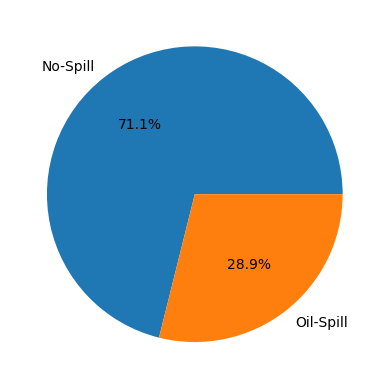

In [12]:
inter=df['TransceiverClass'].value_counts()
plt.pie(inter,labels=['No-Spill','Oil-Spill'],autopct='%0.1f%%',radius=1);

In [15]:
anomalies = df[df['Speed_Change'] > 5]

In [16]:
print("Potential Anomalies Detected:")
print(anomalies)

Potential Anomalies Detected:
              MMSI       LAT        LON   SOG    COG  Speed_Change
1        368095340  29.76995  -95.07893   0.0  185.5           8.0
3        367481310  27.68242  -82.58073  11.5   57.6          11.4
4        248669000  29.85743  -93.94083   3.1  220.9           8.4
23       368181750  28.90797  -94.06336   7.5  119.2           7.5
24       366948310  39.57156  -76.10151   0.0  168.7           7.5
...            ...       ...        ...   ...    ...           ...
7588948  414037000  12.73775  142.58784  11.2  285.3          11.2
7588949  369493762  13.43844  144.65437   0.1  360.0          11.1
7588950  414037000  12.71346  142.68086  11.3  284.0          11.2
7588951  369493762  13.43845  144.65435   0.1  360.0          11.2
7588962  414037000  12.73417  142.60189  11.2  283.6          11.2

[2163803 rows x 6 columns]


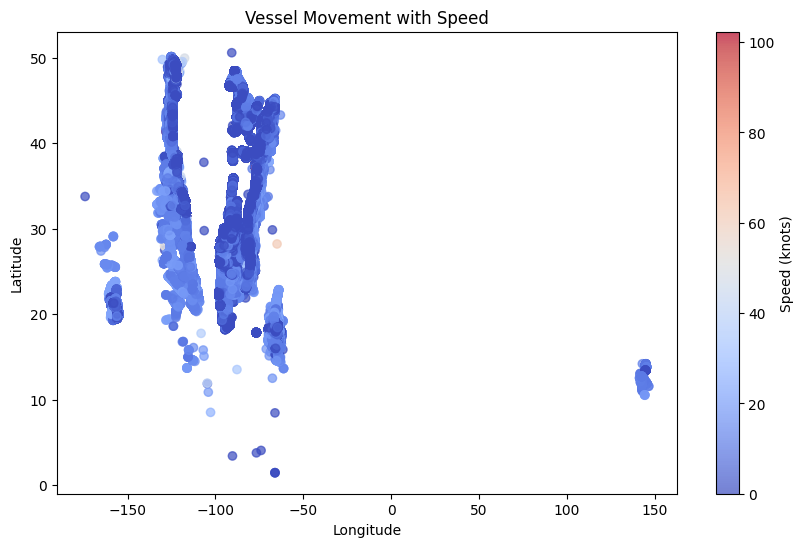

In [17]:
# Plot vessel tracks
plt.figure(figsize=(10, 6))
plt.scatter(df['LON'], df['LAT'], c=df['SOG'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Speed (knots)')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Vessel Movement with Speed")
plt.show()